## E-Commerce - EDA
### Name :-  Rohit Rajendra Patil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import datetime  
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [3]:
pd.__version__

'1.3.4'

In [6]:
df=pd.read_csv(r"C:\Users\Richesh\Desktop\Richesh\Python\Ecommerce - UK Retailer.csv",encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 1. Perform Basic EDA 

In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### Only Quantity is a integer numeric type

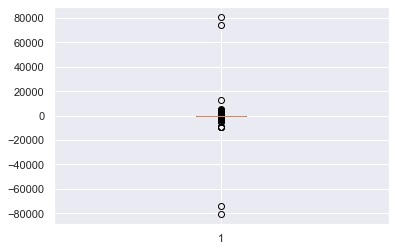

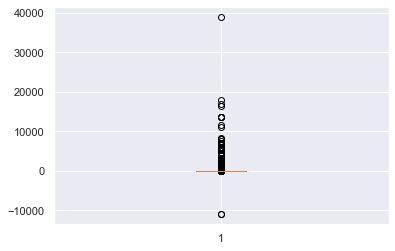

In [8]:
# a. Boxplot – All Numeric Variables
sns.set()
plt.boxplot(df.Quantity)
plt.show()
plt.boxplot(df.UnitPrice)
plt.show()

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>, <AxesSubplot:>]],
      dtype=object)

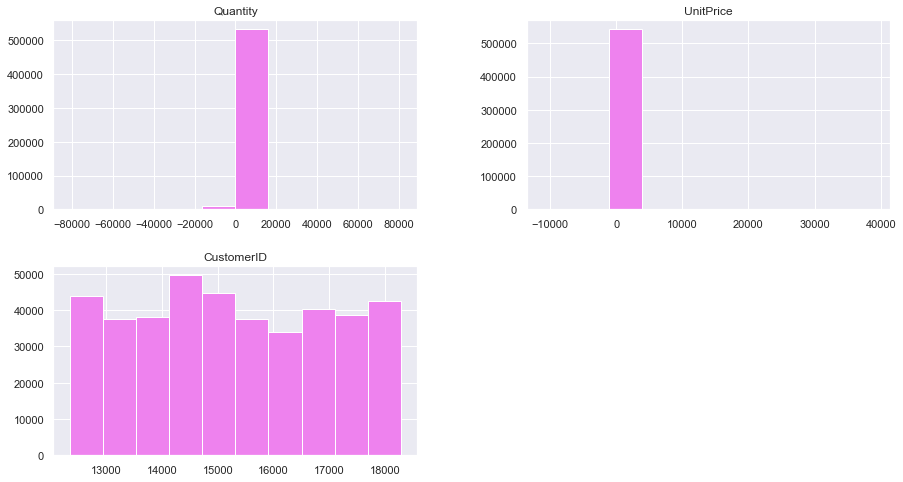

In [9]:
# b. Histogram – All Numeric Variables

sns.set()
df.hist(color='violet',figsize=(15,8))

# c.Distribution Plot – All Numeric Variables

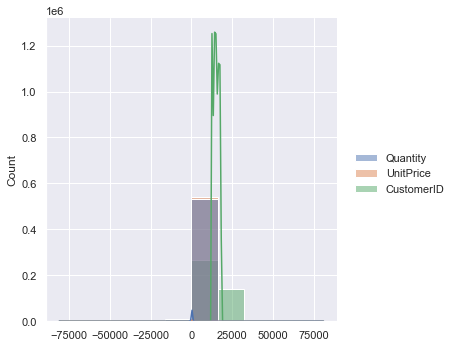

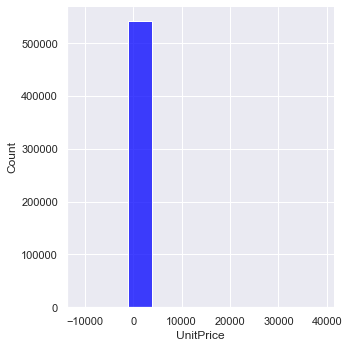

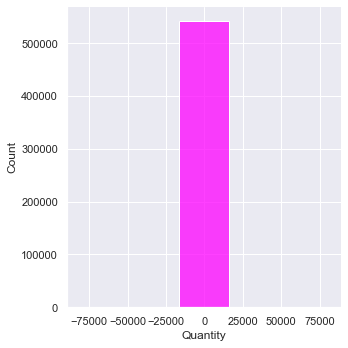

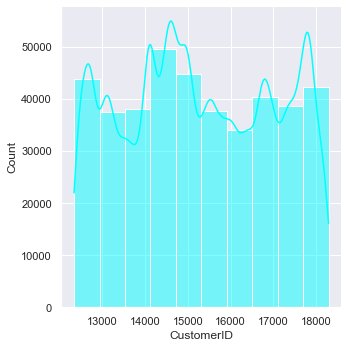

In [10]:
sns.displot(df, bins = 10, kde = True, color='r')
plt.show()
sns.displot(df['UnitPrice'], bins = 10, kde = False, color='blue')
plt.show()
sns.displot(df['Quantity'], bins = 5, kde = False, color='magenta')
plt.show()
sns.displot(df['CustomerID'], bins = 10, kde = True, color='cyan')
plt.show()

## d. Aggregation for all numerical Columns

In [11]:
df.Quantity.mean()

9.55224954743324

In [12]:
df.Quantity.median()

3.0

In [13]:
df.Quantity.mode()

0    1
dtype: int64

In [14]:
df.CustomerID.median()

15152.0

In [15]:
df.CustomerID.mean()

15287.690570239585

In [16]:
df.CustomerID.mode()

0    17841.0
dtype: float64

## f. Duplicate values across all columns

In [17]:
duplicated=df[df.duplicated()]

In [18]:
duplicated.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


## g. Correlation – Heatmap - All Numeric Variables

In [19]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


<AxesSubplot:>

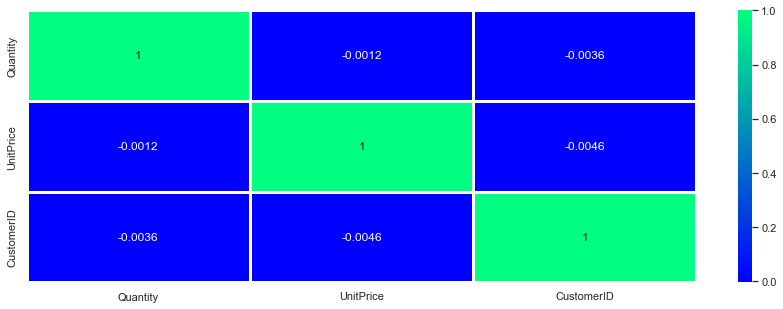

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidths=3,cmap='winter')

## h. Regression Plot - All Numeric Variables

Text(0.5, 1.0, 'UnitPrice vs Quantity')

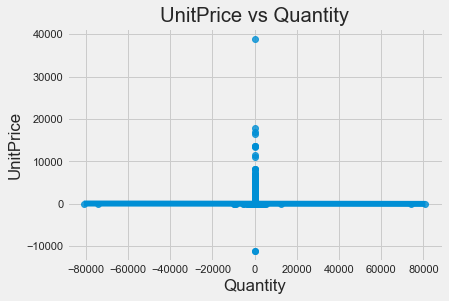

In [21]:
plt.style.use('fivethirtyeight')
sns.regplot(data=df, x='Quantity',y='UnitPrice')
plt.title('UnitPrice vs Quantity')

##  i. Bar Plot – Every Categorical Variable vs every Numerical Variable

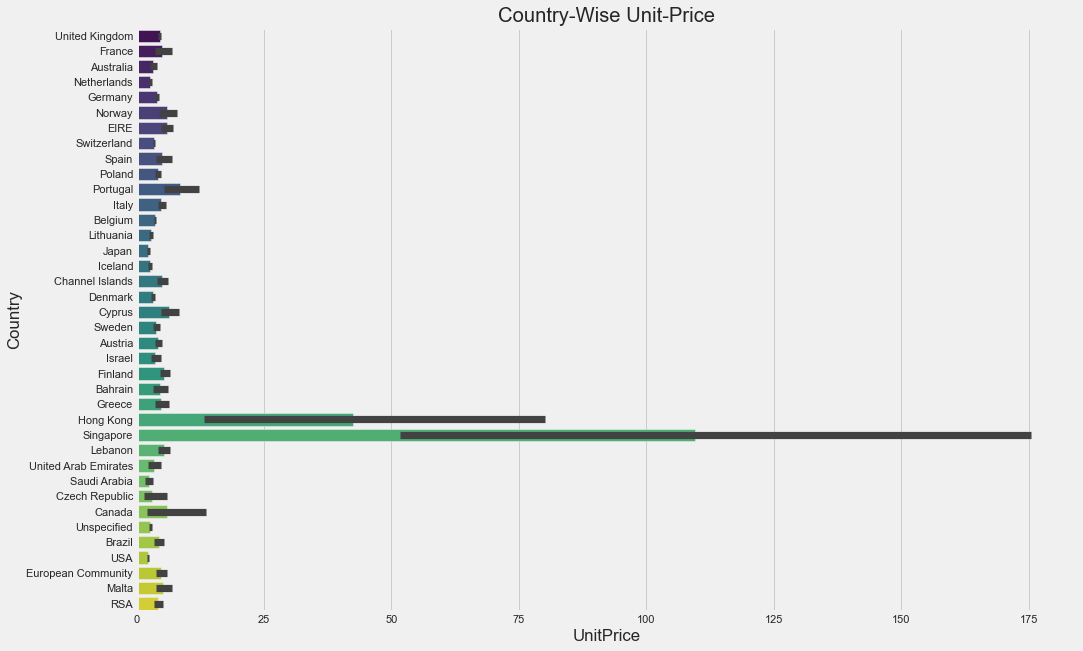

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x='UnitPrice',y='Country',data=df,palette='viridis')
plt.title('Country-Wise Unit-Price')
plt.show()

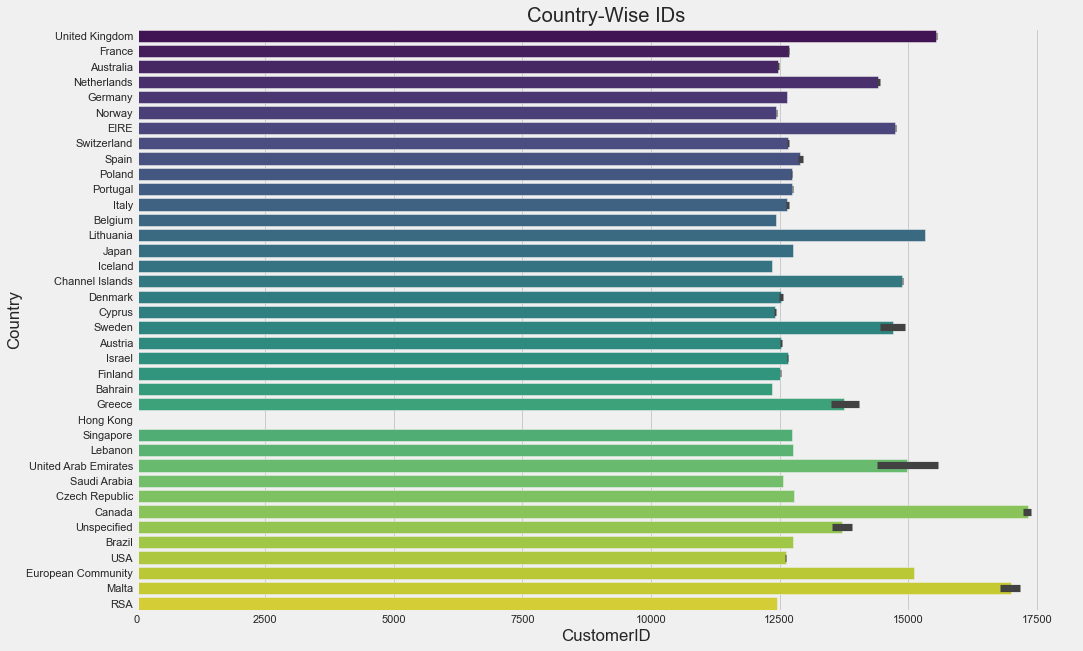

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='CustomerID',y='Country',data=df,palette='viridis')
plt.title('Country-Wise IDs')
plt.show()

# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [24]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [26]:
df.Description.fillna(df.Description.mode()[0],inplace = True) #Replacing the missing value from description with suited statistical method of Mode

In [27]:
df.CustomerID.fillna(df.CustomerID.median(),inplace=True)

###### Replacing the missing value from description with suited statistical method of Media due to datatype being float64

In [28]:
print(df.isnull().sum()) # final output with the required Changes

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# 3. Remove duplicate rows

In [29]:
# Finding the duplicate rows

df.duplicated().sum()

5268

In [30]:
print("Following are the duplicate values are:-")
df.loc[df.duplicated(),:]

Following are the duplicate values are:-


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [31]:
df.drop_duplicates(subset=None, keep='first',inplace=True) #deleting the duplicate rows except the original one

In [32]:
df.duplicated().sum() #evaluating the count of duplicate rows after above analysis

0

In [33]:
df.describe() # Duplicates removed

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15248.659594
std,219.130156,97.233118,1483.813704
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


# 4. Remove rows which have negative values in Quantity column

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### No Negative values observed in quantity column

# 5. Add the columns - Month, Day and Hour for the invoice

In [35]:
df.InvoiceDate=pd.to_datetime(df.InvoiceDate) #converting the string column to date datatypes as observed in above ecom.head()

In [36]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 6. How many orders made by the customers? 

In [37]:
df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

#groupig the customer id and their invoice to exmamin the order made by the customers

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


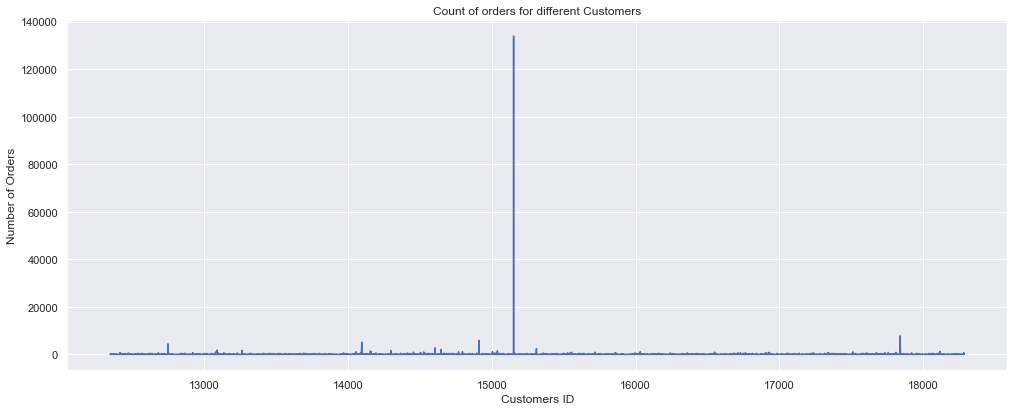

In [38]:
sns.set()
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Count of orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders

In [39]:
print('The TOP 5 customers with max no of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with max no of orders...


,CustomerID,Country,InvoiceNo
2088,15152.0,United Kingdom,133850
4058,17841.0,United Kingdom,7812
1903,14911.0,EIRE,5898
1308,14096.0,United Kingdom,5128
338,12748.0,United Kingdom,4459


# 8. How much money spent by the customers? 

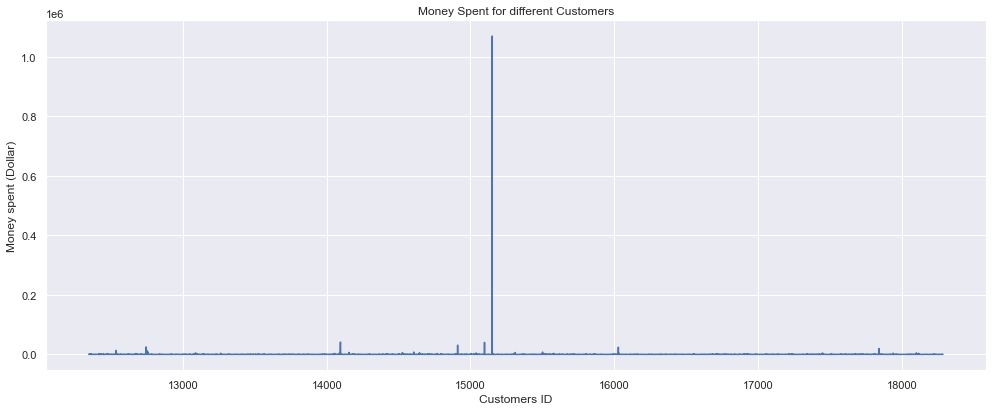

In [40]:
mkr_gone = df.groupby(by=['CustomerID','Country'], as_index=False)['UnitPrice'].sum()

sns.set()
plt.subplots(figsize=(15,6))
plt.plot(mkr_gone.CustomerID, mkr_gone.UnitPrice)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent

In [41]:
print('The TOP 5 customers with max no of orders...')
mkr_gone.sort_values(by='UnitPrice', ascending=False).head()

The TOP 5 customers with max no of orders...


,CustomerID,Country,UnitPrice
2088,15152.0,United Kingdom,1068351.89
1308,14096.0,United Kingdom,41376.33
2035,15098.0,United Kingdom,40278.90
1903,14911.0,EIRE,31025.29
336,12744.0,Singapore,25108.89


# 10. How many orders per month?

In [ ]:
sns.set()
pikapika=df.groupby('InvoiceNo')['InvoiceDate'].unique().value_counts().sort_index().plot(kind="bar",figsize=(15,6),color='c')
pikapika.set_xlabel('Month',fontsize=14)
pikapika.set_ylabel('Number of Orders',fontsize=14)
pikapika.set_title('Nummber of orders by Monthwise',fontsize=20)
pikapika.set_xtixklabels(('des_10','jan_11','feb_11','march_11','apr_11','may_11','jun_11','jul_11','aug_11','sep_11','oct_11','nov_11','dec_11'),Rotation='horizontal',fontsize=14)

# 11. How many orders per day? 

In [ ]:
sns.set()
Day=df.groupby('InvoiceNo')['InvoiceDate'].unique().value_counts().sort_index().plot(kind="bar",figsize=(15,6),color='c')
Day.set_xlabel('Day',fontsize=14)
pikapika.set_ylabel('Number of Orders',fontsize=14)
Day.set_xticklabels(('mon','tue','wed','thur','fri','sat'),rotation='horizontal',fontsize=14)

# 12. How many orders per hour? 

In [ ]:
sns.set()
syduck=df.groupby('InvoiceNo')['InvoiceDate'].unique().value_counts().iloc[:-1].sort_index().plot(kind="bar",figsize=(15,6)
syduck.set_xlabel('Hour')
syduck.set_ylabel('Number of orders')
syduck.set_title('Number of Hours')
syduck.set_xticklabels(range(6,2,1),rotation='horizontal')

# 13. How many orders for each country?

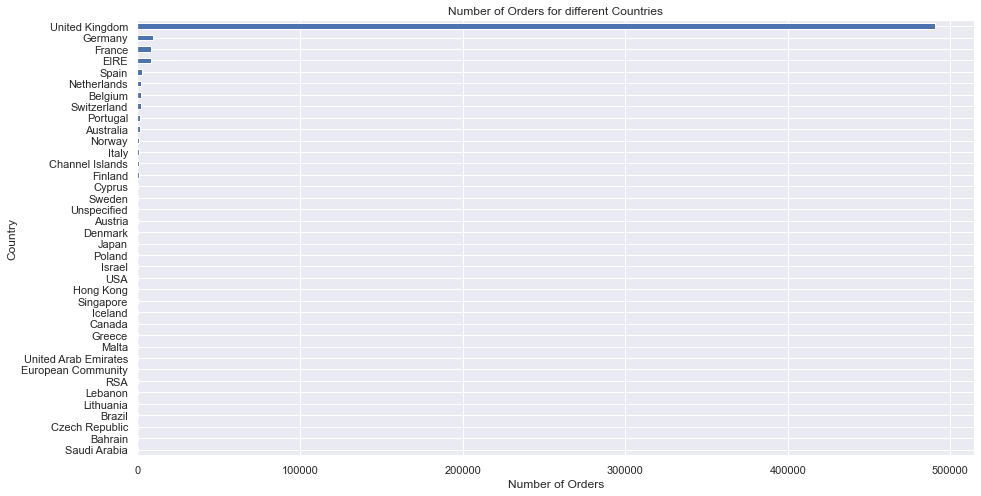

In [19]:
sns.set()
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries')
plt.show()

### Without Considering United Kingdom

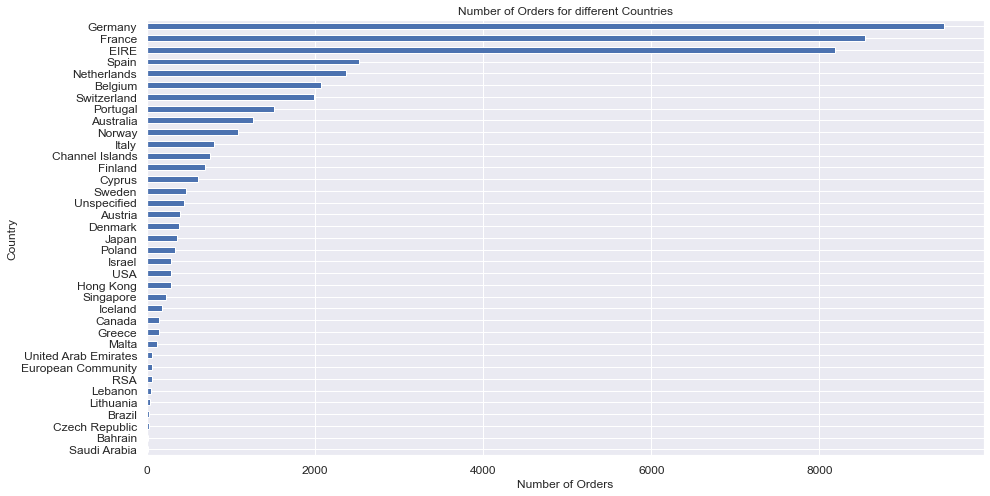

In [20]:
sns.set()
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country without United Kingdom

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh',fontsize=12)
plt.xlabel('Number of Orders',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of Orders for different Countries',fontsize=12)
plt.show()

# 14. Orders trend across months

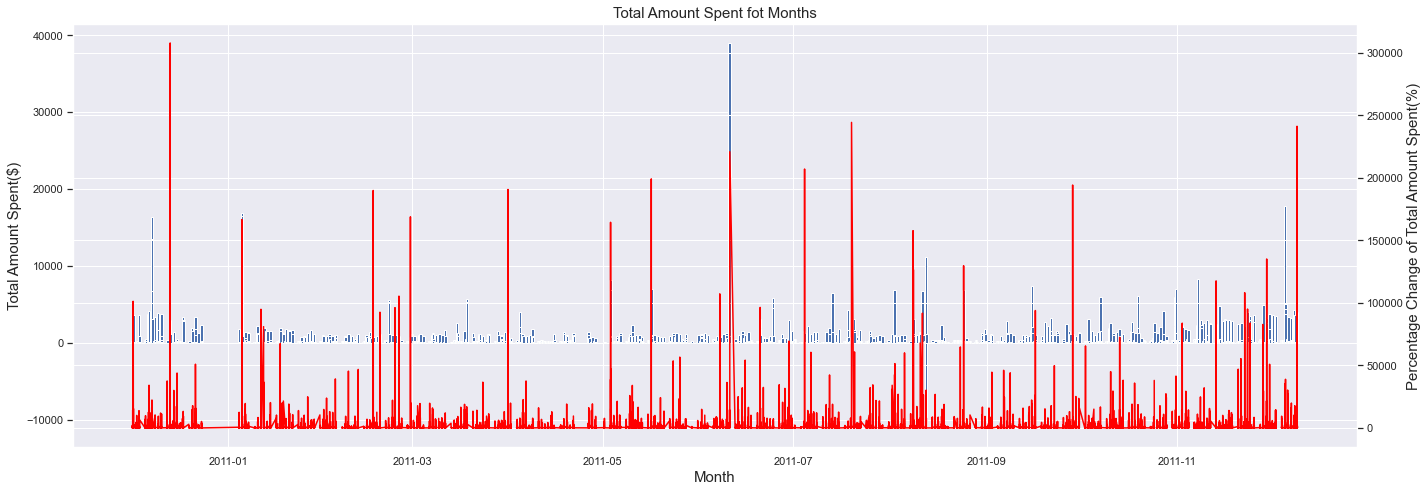

In [21]:
# Trend Plot
fig=plt.figure(figsize=(20,7))
x1=fig.add_subplot(111)
x1.set_xlabel('Month', fontsize=15)
x1.set_ylabel('Total Amount Spent($)',fontsize=15)
x1.set_title('Total Amount Spent fot Months',fontsize=15)
x1.bar(df.groupby(by=['InvoiceDate'])['UnitPrice'].sum().index.tolist()[1:],df.groupby(by=['InvoiceDate'])['UnitPrice'].sum()[1:],alpha=1,label='Amount Spent By Month')     # Alpha For Transparent
x2=x1.twinx()  # Tread Line
x2.set_ylabel('Percentage Change of Total Amount Spent(%)',fontsize=15)
# pct_change() percentage change betweeen the current and prior element.
x2.plot(df.groupby(by=['InvoiceDate'])['UnitPrice'].sum().index.tolist()[1:],df.groupby(by=['InvoiceDate'])['UnitPrice'].sum()[1:].pct_change().fillna(0)*100, label='Percentage Change of Total Amount Spent (%)',color='red')
fig.tight_layout()
plt.show()

# 15. How much money spent by each country? 

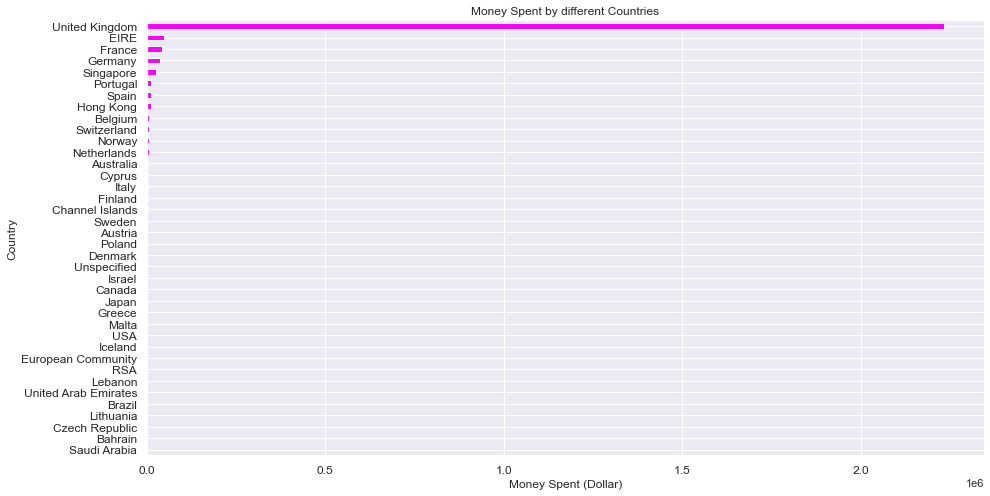

In [22]:
sns.set()
panda_money = df.groupby('Country')['UnitPrice'].sum().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
panda_money.plot(kind='barh', fontsize=12, color='magenta')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

# Again the data is skewed towards United Kingdom, removing it to find better clarity with other countries

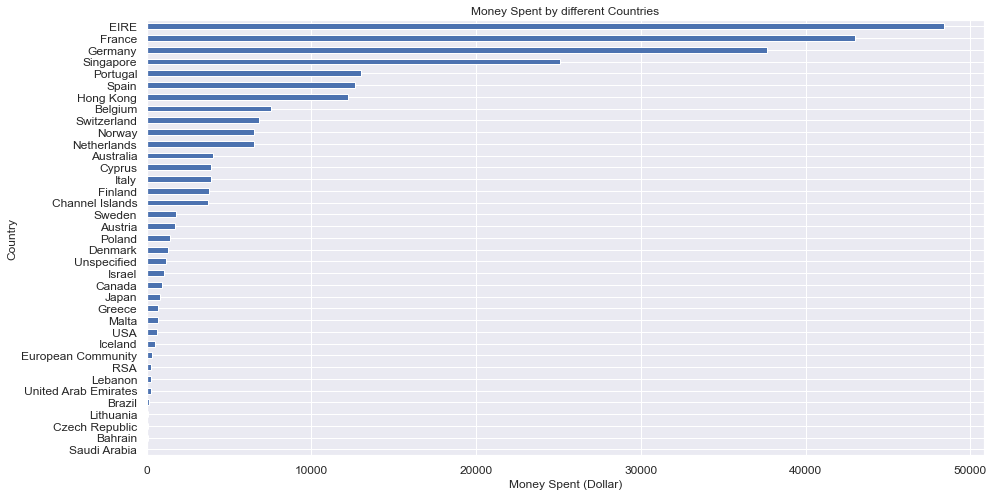

In [23]:
panda_money = df.groupby('Country')['UnitPrice'].sum().sort_values()
del panda_money['United Kingdom']

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
panda_money.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()